<a href="https://colab.research.google.com/github/pichiboii/krispi/blob/main/masters.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Library


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from xgboost import XGBClassifier
import xgboost as xgb
from matplotlib import pyplot as plt
import seaborn as sns
import re
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTENC
from sklearn.metrics import precision_recall_curve

pd.set_option("display.max_columns", None)

# Pre-EDA


| Column                           | Description                                                                                          |
| -------------------------------- | ---------------------------------------------------------------------------------------------------- |
| policy_id                        | Unique identifier of the policyholder                                                                |
| policy_tenure                    | Time period of the policy                                                                            |
| age_of_car                       | Normalized age of car in years                                                                       |
| age_of_policyholder              | Normalized age of policyholder in years                                                              |
| area_cluster                     | Area cluster of the policyholder                                                                     |
| population_density               | Population density of the city (Policyholder City)                                                   |
| make                             | Encoded Manufacturer/company of the car                                                              |
| segment                          | Segment of the car (A/B1/B2/C1/C2)                                                                   |
| model                            | Encoded name of the car                                                                              |
| fuel_type                        | Type of fuel used by the car                                                                         |
| max_torque                       | Maximum torque generated by the car (Nm@rpm)                                                         |
| max_power                        | Maximum Power generated by the car (bhp@rpm)                                                         |
| engine_type                      | Type of engine used in the car                                                                       |
| airbags                          | Number of airbags installed in the car                                                               |
| is_esc                           | Boolean flag indicating whether Electronic Stability Control (ESC) is present in the car or not      |
| is_adjustable_steering           | Boolean flag indicating whether the streering wheel of the car is adjustable or not                  |
| is_tpms                          | Boolean flag indicating whether Tyre Pressure Monitoring System (TPMS) is present in the car or not  |
| is_parking_sensors               | Boolean flag indicating whether parking sensors are present in the car or not                        |
| is_parking_camera                | Boolean flag indicating whether the parking camera is present in the car or not                      |
| rear_brakes_type                 | Type of brakes used in the rear of the car                                                           |
| displacement                     | Engine displacement of the car (cc)                                                                  |
| cylinder                         | Number of cylinders present in the engine of the car                                                 |
| transmission_type                | Transmission type of the car                                                                         |
| gear_box                         | Number of gears in the car                                                                           |
| steering_type                    | Type of the power steering present in the car                                                        |
| turning_radius                   | The space a vehicle needs to make a certain turn (Meters)                                            |
| length                           | Length of the car (Milimetre)                                                                        |
| width                            | Width of the car (Milimetre)                                                                         |
| height                           | Heigh of the car (Milimetre)                                                                         |
| gross_weight                     | The maximum allowable weight of the fully-loaded car, including passengers, cargo and equipment (Kg) |
| is_front_fog_light               | Boolean flag indicating whether front fog lights are available in the car or not                     |
| is_rear_window_wiper             | Boolean flag indicating whether the rear windows wiper is available in the car or not                |
| is_rear_window_washer            | Boolean flag indicating whether the rear windows washer is available in the car or not               |
| is_rear_window_defogger          | Boolean flag indicating whether rear window defogger is available in the car or not                  |
| is_brake_assist                  | Boolean flag indicating whether the brake assistance feature is available in the car or not          |
| is_power_door_lock               | Boolean flag indicating whether a power door lock is available in the car or not                     |
| is_central_locking               | Boolean flag indicating whether the central locking feature is available in the car or not           |
| is_power_streering               | Boolean flag indicating whether power steering is available in the car or not                        |
| is_driver_seat_height_adjustable | Boolean flag indicating whether the height of the driver seat is adjustable or not                   |
| is_day_night_rear_view_mirror    | Boolean flag indicating whether day & night rearview mirror is present in the car or not             |
| is_ecw                           | Boolean flag indicating whether Engine Check Warning (ECW) is available in the car or not            |
| is_speed_alert                   | Boolean flag indicating whether the speed alert system is available in the car or not                |
| ncap_rating                      | Safety rating given by NCAP (out of 5)                                                               |
| is_claim                         | Outcome: Boolean flag indicating whether the policyholder file a claim in the next 6 months or not   |


## Data Import


In [ ]:
url='https://drive.google.com/file/d/1U3WwN4yEGON6Blva1PcYl5YlxhAy2C3l/view?usp=drive_link'
url='https://drive.google.com/uc?id=' + url.split('/')[-2]
data= pd.read_csv(url)
data.head()

,policy_id,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,make,segment,model,fuel_type,max_torque,max_power,engine_type,airbags,is_esc,is_adjustable_steering,is_tpms,is_parking_sensors,is_parking_camera,rear_brakes_type,displacement,cylinder,transmission_type,gear_box,steering_type,turning_radius,length,width,height,gross_weight,is_front_fog_lights,is_rear_window_wiper,is_rear_window_washer,is_rear_window_defogger,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,is_claim
0,ID00001,0.515874,0.05,0.644231,C1,4990,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2,No,No,No,Yes,No,Drum,796,3,Manual,5,Power,4.6,3445,1515,1475,1185,No,No,No,No,No,No,No,Yes,No,No,No,Yes,0,0
1,ID00002,0.672619,0.02,0.375000,C2,27003,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2,No,No,No,Yes,No,Drum,796,3,Manual,5,Power,4.6,3445,1515,1475,1185,No,No,No,No,No,No,No,Yes,No,No,No,Yes,0,0
2,ID00003,0.841110,0.02,0.384615,C3,4076,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2,No,No,No,Yes,No,Drum,796,3,Manual,5,Power,4.6,3445,1515,1475,1185,No,No,No,No,No,No,No,Yes,No,No,No,Yes,0,0
3,ID00004,0.900277,0.11,0.432692,C4,21622,1,C1,M2,Petrol,113Nm@4400rpm,88.50bhp@6000rpm,1.2 L K12N Dualjet,2,Yes,Yes,No,Yes,Yes,Drum,1197,4,Automatic,5,Electric,4.8,3995,1735,1515,1335,Yes,No,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,2,0
4,ID00005,0.596403,0.11,0.634615,C5,34738,2,A,M3,Petrol,91Nm@4250rpm,67.06bhp@5500rpm,1.0 SCe,2,No,No,No,No,Yes,Drum,999,3,Automatic,5,Electric,5.0,3731,1579,1490,1155,No,No,No,No,No,Yes,Yes,Yes,No,Yes,Yes,Yes,2,0


In [ ]:
data.sample(5)

,policy_id,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,make,segment,model,fuel_type,max_torque,max_power,engine_type,airbags,is_esc,is_adjustable_steering,is_tpms,is_parking_sensors,is_parking_camera,rear_brakes_type,displacement,cylinder,transmission_type,gear_box,steering_type,turning_radius,length,width,height,gross_weight,is_front_fog_lights,is_rear_window_wiper,is_rear_window_washer,is_rear_window_defogger,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,is_claim
46405,ID46406,0.261691,0.17,0.375000,C8,8794,2,A,M3,Petrol,91Nm@4250rpm,67.06bhp@5500rpm,1.0 SCe,2,No,No,No,No,Yes,Drum,999,3,Automatic,5,Electric,5.0,3731,1579,1490,1155,No,No,No,No,No,Yes,Yes,Yes,No,Yes,Yes,Yes,2,0
39087,ID39088,0.034452,0.03,0.317308,C7,6112,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2,No,No,No,Yes,No,Drum,796,3,Manual,5,Power,4.6,3445,1515,1475,1185,No,No,No,No,No,No,No,Yes,No,No,No,Yes,0,0
5288,ID05289,0.096755,0.09,0.288462,C7,6112,1,B2,M6,Petrol,113Nm@4400rpm,88.50bhp@6000rpm,K Series Dual jet,2,No,Yes,No,Yes,No,Drum,1197,4,Manual,5,Electric,4.8,3845,1735,1530,1335,Yes,No,No,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,2,0
40572,ID40573,1.233890,0.06,0.528846,C8,8794,1,B2,M6,Petrol,113Nm@4400rpm,88.50bhp@6000rpm,K Series Dual jet,2,No,Yes,No,Yes,No,Drum,1197,4,Manual,5,Electric,4.8,3845,1735,1530,1335,Yes,No,No,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,2,0
36586,ID36587,1.158724,0.02,0.701923,C8,8794,1,B2,M6,Petrol,113Nm@4400rpm,88.50bhp@6000rpm,K Series Dual jet,2,No,Yes,No,Yes,No,Drum,1197,4,Manual,5,Electric,4.8,3845,1735,1530,1335,Yes,No,No,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,2,1


## Data Splitting


In [ ]:
X_train_raw, X_test_raw, y_train, y_test = train_test_split(
    data.drop(columns=["is_claim"]),
    data["is_claim"],
    test_size=0.2,
    random_state=42,
    stratify=data["is_claim"],
)
X_train_raw

,policy_id,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,make,segment,model,fuel_type,max_torque,max_power,engine_type,airbags,is_esc,is_adjustable_steering,is_tpms,is_parking_sensors,is_parking_camera,rear_brakes_type,displacement,cylinder,transmission_type,gear_box,steering_type,turning_radius,length,width,height,gross_weight,is_front_fog_lights,is_rear_window_wiper,is_rear_window_washer,is_rear_window_defogger,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating
47135,ID47136,0.293321,0.18,0.471154,C5,34738,1,C1,M2,Petrol,113Nm@4400rpm,88.50bhp@6000rpm,1.2 L K12N Dualjet,2,Yes,Yes,No,Yes,Yes,Drum,1197,4,Automatic,5,Electric,4.8,3995,1735,1515,1335,Yes,No,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,2
58128,ID58129,0.393585,0.09,0.336538,C13,5410,1,B1,M8,CNG,82.1Nm@3400rpm,55.92bhp@5300rpm,K10C,2,No,No,No,Yes,No,Drum,998,3,Manual,5,Power,4.7,3655,1620,1675,1340,No,No,No,No,No,Yes,Yes,Yes,No,No,Yes,Yes,2
35000,ID35001,1.068827,0.03,0.605769,C8,8794,1,B2,M6,Petrol,113Nm@4400rpm,88.50bhp@6000rpm,K Series Dual jet,2,No,Yes,No,Yes,No,Drum,1197,4,Manual,5,Electric,4.8,3845,1735,1530,1335,Yes,No,No,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,2
6078,ID06079,0.603159,0.08,0.644231,C5,34738,1,B2,M6,Petrol,113Nm@4400rpm,88.50bhp@6000rpm,K Series Dual jet,2,No,Yes,No,Yes,No,Drum,1197,4,Manual,5,Electric,4.8,3845,1735,1530,1335,Yes,No,No,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,2
34780,ID34781,0.830327,0.01,0.528846,C13,5410,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2,No,No,No,Yes,No,Drum,796,3,Manual,5,Power,4.6,3445,1515,1475,1185,No,No,No,No,No,No,No,Yes,No,No,No,Yes,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33378,ID33379,0.955137,0.04,0.307692,C8,8794,5,C1,M9,Diesel,200Nm@1750rpm,97.89bhp@3600rpm,i-DTEC,2,No,Yes,No,Yes,Yes,Drum,1498,4,Manual,5,Electric,4.9,3995,1695,1501,1051,Yes,No,No,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,4
56110,ID56111,0.950547,0.01,0.490385,C10,73430,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2,No,No,No,Yes,No,Drum,796,3,Manual,5,Power,4.6,3445,1515,1475,1185,No,No,No,No,No,No,No,Yes,No,No,No,Yes,0
10483,ID10484,0.387866,0.12,0.605769,C20,20905,1,B2,M6,Petrol,113Nm@4400rpm,88.50bhp@6000rpm,K Series Dual jet,2,No,Yes,No,Yes,No,Drum,1197,4,Manual,5,Electric,4.8,3845,1735,1530,1335,Yes,No,No,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,2
34809,ID34810,0.317644,0.01,0.490385,C3,4076,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2,No,No,No,Yes,No,Drum,796,3,Manual,5,Power,4.6,3445,1515,1475,1185,No,No,No,No,No,No,No,Yes,No,No,No,Yes,0


# EDA (simple)


In [ ]:
train_data = pd.concat([X_train_raw, y_train], axis=1)

In [ ]:
train_data.isna().sum()


,0
policy_id,0
policy_tenure,0
age_of_car,0
age_of_policyholder,0
area_cluster,0
population_density,0
make,0
segment,0
model,0
fuel_type,0


In [ ]:
train_data.describe(include="all")


,policy_id,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,make,segment,model,fuel_type,max_torque,max_power,engine_type,airbags,is_esc,is_adjustable_steering,is_tpms,is_parking_sensors,is_parking_camera,rear_brakes_type,displacement,cylinder,transmission_type,gear_box,steering_type,turning_radius,length,width,height,gross_weight,is_front_fog_lights,is_rear_window_wiper,is_rear_window_washer,is_rear_window_defogger,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,is_claim
count,46873,46873.000000,46873.000000,46873.000000,46873,46873.000000,46873.000000,46873,46873,46873,46873,46873,46873,46873.000000,46873,46873,46873,46873,46873,46873,46873.000000,46873.000000,46873,46873.000000,46873,46873.000000,46873.000000,46873.000000,46873.000000,46873.000000,46873,46873,46873,46873,46873,46873,46873,46873,46873,46873,46873,46873,46873.000000,46873.000000
unique,46873,NaN,NaN,NaN,22,NaN,NaN,6,11,3,9,9,11,NaN,2,2,2,2,2,2,NaN,NaN,2,NaN,3,NaN,NaN,NaN,NaN,NaN,2,2,2,2,2,2,2,2,2,2,2,2,NaN,NaN
top,ID25791,NaN,NaN,NaN,C8,NaN,NaN,B2,M1,Petrol,113Nm@4400rpm,88.50bhp@6000rpm,F8D Petrol Engine,NaN,No,Yes,No,Yes,No,Drum,NaN,NaN,Manual,NaN,Power,NaN,NaN,NaN,NaN,NaN,Yes,No,No,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,NaN,NaN
freq,1,NaN,NaN,NaN,10953,NaN,NaN,14702,11887,16459,14257,14257,11887,NaN,32162,28472,35659,44966,28537,35659,NaN,NaN,30550,NaN,26731,NaN,NaN,NaN,NaN,NaN,27189,33295,33295,30444,25766,34009,34009,45896,27484,28991,34009,46578,NaN,NaN
mean,NaN,0.612408,0.069343,0.469697,NaN,18829.491946,1.766774,NaN,NaN,NaN,NaN,NaN,NaN,3.137862,NaN,NaN,NaN,NaN,NaN,NaN,1163.143345,3.628272,NaN,5.245536,NaN,4.853295,3851.108143,1672.481983,1553.453203,1385.409788,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.763787,0.063960
std,NaN,0.414739,0.056389,0.122799,NaN,17660.971421,1.139808,NaN,NaN,NaN,NaN,NaN,NaN,1.833305,NaN,NaN,NaN,NaN,NaN,NaN,266.068922,0.483271,NaN,0.430409,NaN,0.227930,311.079047,111.985636,79.672626,212.480747,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.390179,0.244684
min,NaN,0.002735,0.000000,0.288462,NaN,290.000000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,796.000000,3.000000,NaN,5.000000,NaN,4.500000,3445.000000,1475.000000,1475.000000,1051.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000
25%,NaN,0.209692,0.020000,0.375000,NaN,6112.000000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,2.000000,NaN,NaN,NaN,NaN,NaN,NaN,796.000000,3.000000,NaN,5.000000,NaN,4.600000,3445.000000,1515.000000,1475.000000,1185.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000
50%,NaN,0.575494,0.060000,0.451923,NaN,8794.000000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,2.000000,NaN,NaN,NaN,NaN,NaN,NaN,1197.000000,4.000000,NaN,5.000000,NaN,4.800000,3845.000000,1735.000000,1530.000000,1335.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.000000,0.000000
75%,NaN,1.040034,0.110000,0.548077,NaN,27003.000000,3.000000,NaN,NaN,NaN,NaN,NaN,NaN,6.000000,NaN,NaN,NaN,NaN,NaN,NaN,1493.000000,4.000000,NaN,5.000000,NaN,5.000000,3995.000000,1755.000000,1635.000000,1510.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.000000,0.000000


              Jumlah  Persentase (%)
area_cluster                        
C8             10953           23.37
C2              5876           12.54
C5              5574           11.89
C3              4852           10.35
C14             2942            6.28
C13             2751            5.87
C10             2520            5.38
C9              2182            4.66
C7              1728            3.69
C12             1284            2.74
C1              1164            2.48
C11              974            2.08
C19              748            1.60
C6               707            1.51
C15              621            1.32
C4               526            1.12
C17              399            0.85
C16              322            0.69
C21              299            0.64
C18              203            0.43
C22              159            0.34
C20               89            0.19

Proporsi per cluster (%):
is_claim          0      1
area_cluster              
C1            94.93   5.07
C10 

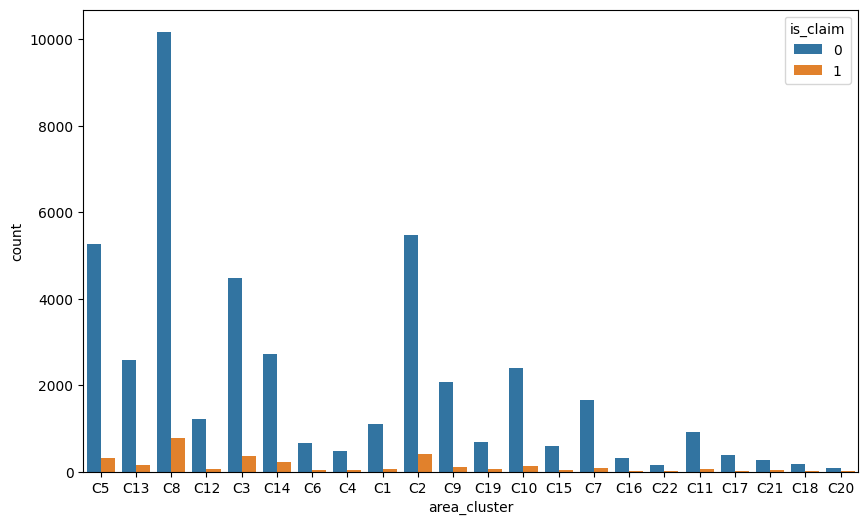

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x="area_cluster", data=train_data, hue="is_claim")

cluster_counts = train_data["area_cluster"].value_counts()
cluster_percent = (train_data["area_cluster"].value_counts(normalize=True) * 100).round(2)

cluster_summary = pd.DataFrame({
    "Jumlah": cluster_counts,
    "Persentase (%)": cluster_percent
})

print(cluster_summary)

counts = train_data.groupby(["area_cluster", "is_claim"]).size().unstack(fill_value=0)
proportions = (counts.T / counts.sum(axis=1)).T * 100

print("\nProporsi per cluster (%):")
print(proportions.round(2))

<Axes: xlabel='segment', ylabel='count'>

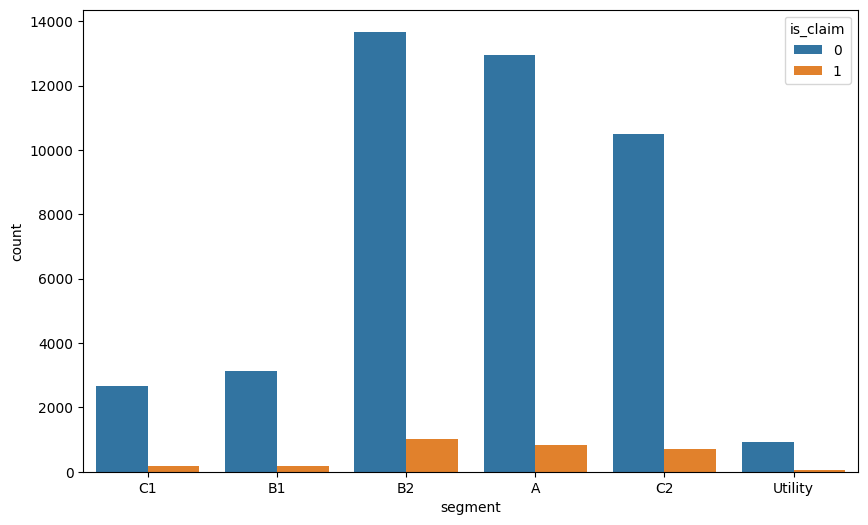

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x="segment", data=train_data, hue="is_claim")


       Jumlah  Persentase (%)
model                        
M1      11887           25.36
M4      11214           23.92
M6      11055           23.59
M8       3335            7.11
M7       2364            5.04
M3       1907            4.07
M9       1718            3.67
M5       1283            2.74
M10       977            2.08
M2        838            1.79
M11       295            0.63

Proporsi per cluster (%):
is_claim      0     1
model                
M1        93.82  6.18
M10       93.65  6.35
M11       95.59  4.41
M2        92.72  7.28
M3        94.70  5.30
M4        93.70  6.30
M5        92.52  7.48
M6        93.05  6.95
M7        93.23  6.77
M8        94.30  5.70
M9        93.89  6.11


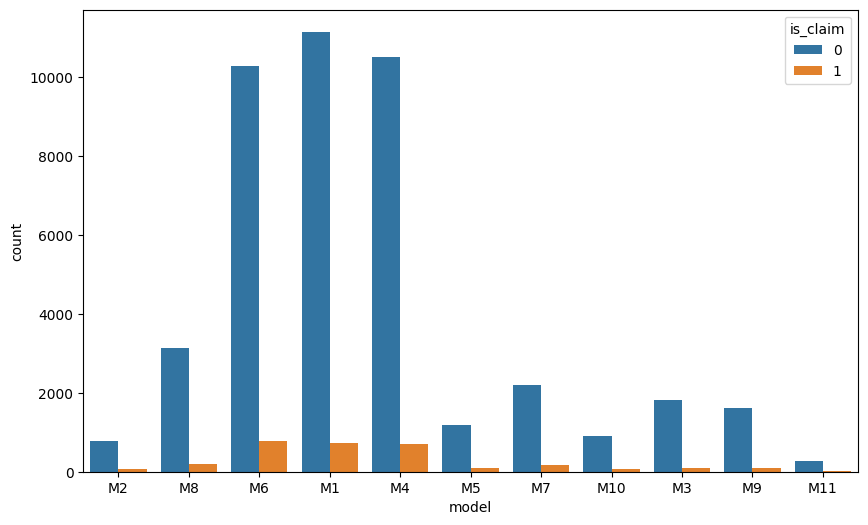

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x="model", data=train_data, hue="is_claim")

model_counts = train_data["model"].value_counts()
model_percent = (train_data["model"].value_counts(normalize=True) * 100).round(2)

model_summary = pd.DataFrame({
    "Jumlah": model_counts,
    "Persentase (%)": model_percent
})

print(model_summary)

counts = train_data.groupby(["model", "is_claim"]).size().unstack(fill_value=0)
proportions = (counts.T / counts.sum(axis=1)).T * 100

print("\nProporsi per cluster (%):")
print(proportions.round(2))

<Axes: xlabel='fuel_type', ylabel='count'>

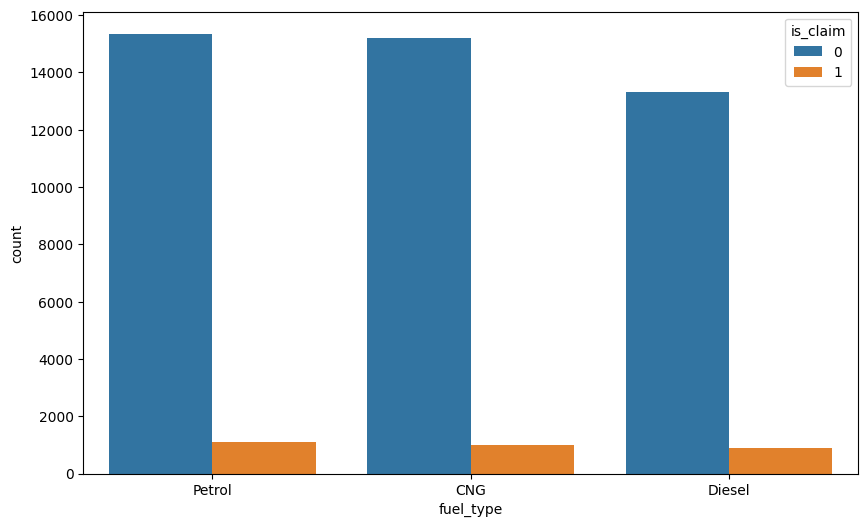

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x="fuel_type", data=train_data, hue="is_claim")

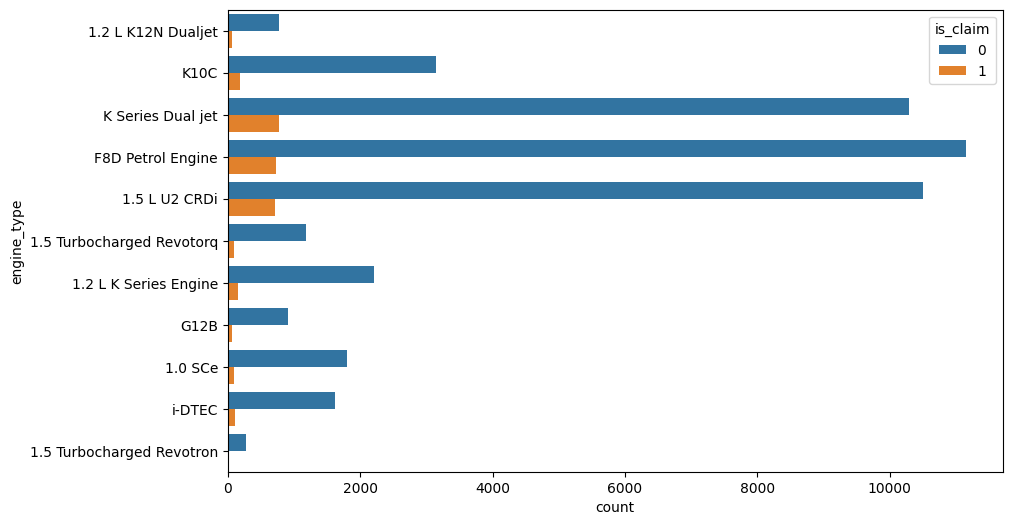

                           Jumlah  Persentase (%)
engine_type                                      
F8D Petrol Engine           11887           25.36
1.5 L U2 CRDi               11214           23.92
K Series Dual jet           11055           23.59
K10C                         3335            7.11
1.2 L K Series Engine        2364            5.04
1.0 SCe                      1907            4.07
i-DTEC                       1718            3.67
1.5 Turbocharged Revotorq    1283            2.74
G12B                          977            2.08
1.2 L K12N Dualjet            838            1.79
1.5 Turbocharged Revotron     295            0.63

Proporsi per cluster (%):
is_claim                       0     1
engine_type                           
1.0 SCe                    94.70  5.30
1.2 L K Series Engine      93.23  6.77
1.2 L K12N Dualjet         92.72  7.28
1.5 L U2 CRDi              93.70  6.30
1.5 Turbocharged Revotorq  92.52  7.48
1.5 Turbocharged Revotron  95.59  4.41
F8D Petrol 

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(y="engine_type", data=train_data, hue="is_claim")
# plt.xticks(rotation=90)
plt.show()

engine_type_counts = train_data["engine_type"].value_counts()
engine_type_percent = (train_data["engine_type"].value_counts(normalize=True) * 100).round(2)

engine_type_summary = pd.DataFrame({
    "Jumlah": engine_type_counts,
    "Persentase (%)": engine_type_percent
})

print(engine_type_summary)

counts = train_data.groupby(["engine_type", "is_claim"]).size().unstack(fill_value=0)
proportions = (counts.T / counts.sum(axis=1)).T * 100

print("\nProporsi per cluster (%):")
print(proportions.round(2))

<Axes: xlabel='make', ylabel='count'>

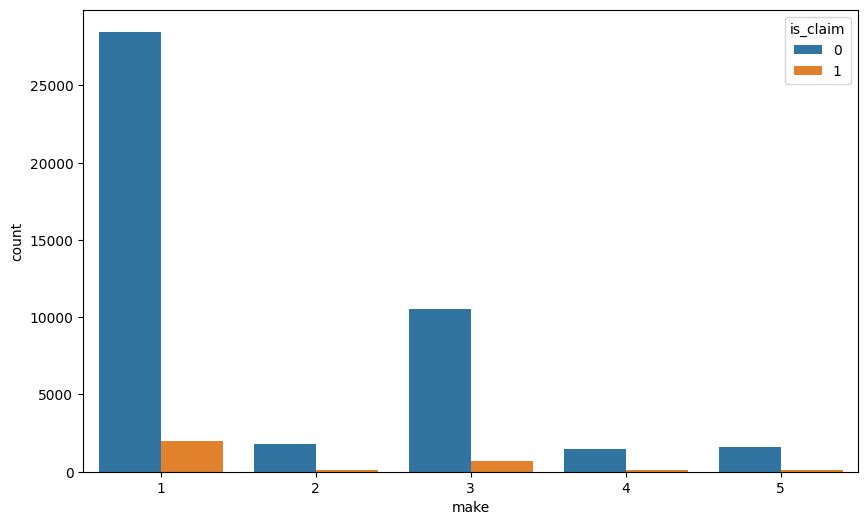

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x="make", data=train_data, hue="is_claim")


<Axes: xlabel='rear_brakes_type', ylabel='count'>

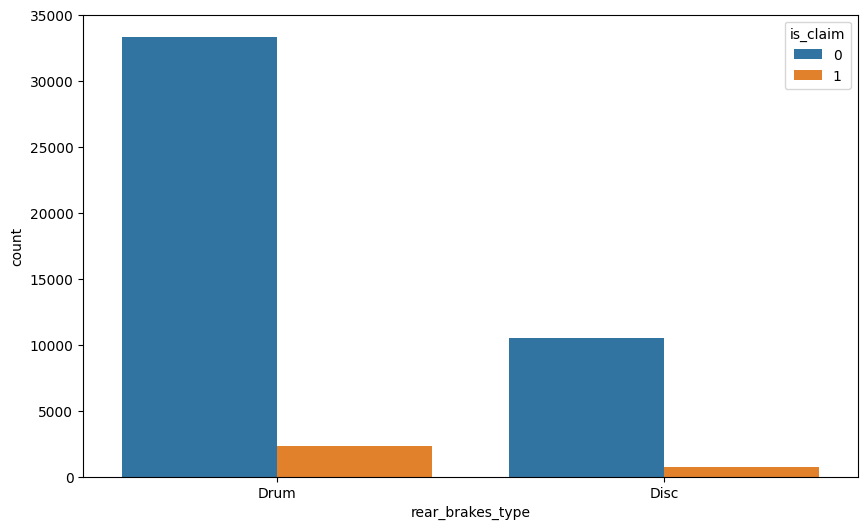

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x="rear_brakes_type", data=train_data, hue="is_claim")


<Axes: xlabel='ncap_rating', ylabel='count'>

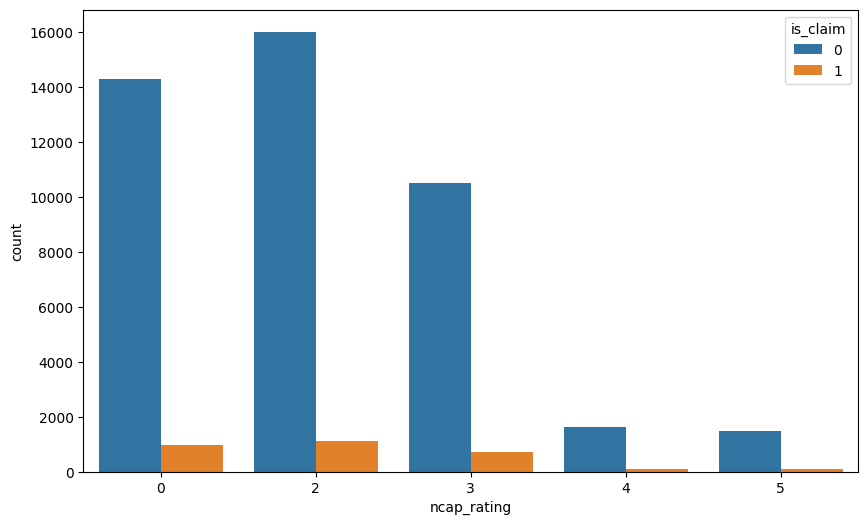

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x="ncap_rating", data=train_data, hue="is_claim")


<Axes: xlabel='is_speed_alert', ylabel='count'>

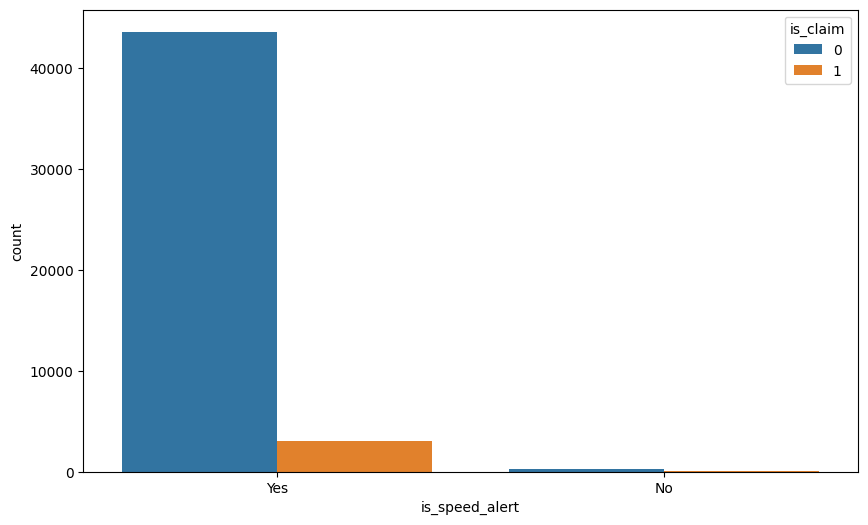

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x="is_speed_alert", data=train_data, hue="is_claim")


<Axes: xlabel='population_density'>

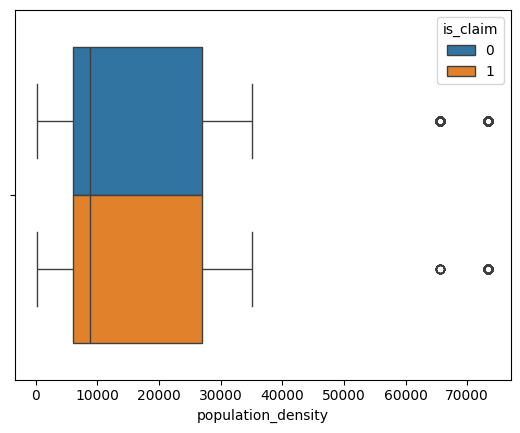

In [ ]:
sns.boxplot(data=train_data, x="population_density", hue="is_claim")

consider drop or OHE:

- area_cluster
- segment
- model
- fuel_type
- engine_type
- make
- rear_brakes_type
- transmission_type
- steering_type
-

extract and normalize:

- max_torque
- max_power

fix value:

- ncap_rating


# Preprocessing


- benerin preprocessing : no ohe, astype category (done)
- cek chi2 kategorik, cek pearson numerik

In [ ]:
def preprocessing(df):
    df = df.copy()
    df = df.drop(
        columns=[
            "policy_id",
        ],
    )

    def normalize_power(x):
        if pd.isna(x):
            return x
        numbers = re.findall(r"\d+\.?\d*", x)
        if len(numbers) == 2:
            return float(numbers[0]) / float(numbers[1])
        return None

    df["max_power"] = df["max_power"].apply(normalize_power)

    def normalize_torque(x):
        if pd.isna(x):
            return x
        numbers = re.findall(r"\d+\.?\d*", x)
        if len(numbers) == 2:
            return float(numbers[0]) / float(numbers[1])
        return None

    df["max_torque"] = df["max_torque"].apply(normalize_torque)

    df["is_esc"] = df["is_esc"].apply(lambda x: 1 if x.lower() == "yes" else 0)
    df["is_adjustable_steering"] = df["is_adjustable_steering"].apply(
        lambda x: 1 if x.lower() == "yes" else 0
    )
    df["is_tpms"] = df["is_tpms"].apply(lambda x: 1 if x.lower() == "yes" else 0)
    df["is_parking_sensors"] = df["is_parking_sensors"].apply(
        lambda x: 1 if x.lower() == "yes" else 0
    )
    df["is_parking_camera"] = df["is_parking_camera"].apply(
        lambda x: 1 if x.lower() == "yes" else 0
    )
    df["is_front_fog_lights"] = df["is_front_fog_lights"].apply(
        lambda x: 1 if x.lower() == "yes" else 0
    )
    df["is_rear_window_wiper"] = df["is_rear_window_wiper"].apply(
        lambda x: 1 if x.lower() == "yes" else 0
    )
    df["is_rear_window_washer"] = df["is_rear_window_washer"].apply(
        lambda x: 1 if x.lower() == "yes" else 0
    )
    df["is_rear_window_defogger"] = df["is_rear_window_defogger"].apply(
        lambda x: 1 if x.lower() == "yes" else 0
    )
    df["is_brake_assist"] = df["is_brake_assist"].apply(
        lambda x: 1 if x.lower() == "yes" else 0
    )
    df["is_power_door_locks"] = df["is_power_door_locks"].apply(
        lambda x: 1 if x.lower() == "yes" else 0
    )
    df["is_central_locking"] = df["is_central_locking"].apply(
        lambda x: 1 if x.lower() == "yes" else 0
    )
    df["is_power_steering"] = df["is_power_steering"].apply(
        lambda x: 1 if x.lower() == "yes" else 0
    )
    df["is_driver_seat_height_adjustable"] = df[
        "is_driver_seat_height_adjustable"
    ].apply(lambda x: 1 if x.lower() == "yes" else 0)

    df["is_day_night_rear_view_mirror"] = df["is_day_night_rear_view_mirror"].apply(
        lambda x: 1 if x.lower() == "yes" else 0
    )
    df["is_ecw"] = df["is_ecw"].apply(lambda x: 1 if x.lower() == "yes" else 0)

    df["is_speed_alert"] = df["is_speed_alert"].apply(
        lambda x: 1 if x.lower() == "yes" else 0
    )
    df["ncap_rating"] = df["ncap_rating"].apply(lambda x: 1 if x == 0 else x)

    area_cluster_categories = df['area_cluster'].unique()
    model_categories = df['model'].unique()

    area_cluster_mapping = {cat:int(re.findall(r'\d+', cat)[0]) for cat in area_cluster_categories}
    model_mapping = {cat:int(re.findall(r'\d+', cat)[0]) for cat in model_categories}

    df['area_cluster'] = df['area_cluster'].map(area_cluster_mapping)
    df['model'] = df['model'].map(model_mapping)

    categorical_cols = [
    "is_esc",
    "is_adjustable_steering",
    "is_tpms",
    "is_parking_sensors",
    "is_parking_camera",
    "is_front_fog_lights",
    "is_rear_window_wiper",
    "is_rear_window_washer",
    "is_rear_window_defogger",
    "is_brake_assist",
    "is_power_door_locks",
    "is_central_locking",
    "is_power_steering",
    "is_driver_seat_height_adjustable",
    "is_day_night_rear_view_mirror",
    "is_ecw",
    "is_speed_alert",
    "ncap_rating",
    "area_cluster",
    "segment",
    "model",
    "fuel_type",
    "engine_type",
    "make",
    "rear_brakes_type",
    "transmission_type",
    "steering_type",
    ]

    for col in categorical_cols:
      df[col] = df[col].astype("category")

    return df


X_train = preprocessing(X_train_raw)
X_test = preprocessing(X_test_raw)

# label encode
cols_to_le = [
    "segment",
    "fuel_type",
    "engine_type",
    "rear_brakes_type",
    "transmission_type",
    "steering_type",
]
encoders = {}

for col in cols_to_le:
    le = LabelEncoder()

    X_train[col] = le.fit_transform(X_train[col])
    X_test[col] = le.transform(X_test[col])

    encoders[col] = le

# smotenc
categorical_features = X_train.select_dtypes(include=["category"]).columns
categorical_indices = [X_train.columns.get_loc(col) for col in categorical_features]

smote_nc = SMOTENC(categorical_features=categorical_indices, random_state=42)
X_train_smote, y_train_smote = smote_nc.fit_resample(X_train, y_train)


In [ ]:
# def preprocessing(df):
#     df = df.copy()
#     df = df.drop(
#         columns=[
#             "policy_id",
#         ],
#     )

#     def normalize_power(x):
#         if pd.isna(x):
#             return x
#         numbers = re.findall(r"\d+\.?\d*", x)
#         if len(numbers) == 2:
#             return float(numbers[0]) / float(numbers[1])
#         return None

#     df["max_power"] = df["max_power"].apply(normalize_power)

#     def normalize_torque(x):
#         if pd.isna(x):
#             return x
#         numbers = re.findall(r"\d+\.?\d*", x)
#         if len(numbers) == 2:
#             return float(numbers[0]) / float(numbers[1])
#         return None

#     df["max_torque"] = df["max_torque"].apply(normalize_torque)

#     df["is_esc"] = df["is_esc"].apply(lambda x: 1 if x.lower() == "yes" else 0)
#     df["is_adjustable_steering"] = df["is_adjustable_steering"].apply(
#         lambda x: 1 if x.lower() == "yes" else 0
#     )
#     df["is_tpms"] = df["is_tpms"].apply(lambda x: 1 if x.lower() == "yes" else 0)
#     df["is_parking_sensors"] = df["is_parking_sensors"].apply(
#         lambda x: 1 if x.lower() == "yes" else 0
#     )
#     df["is_parking_camera"] = df["is_parking_camera"].apply(
#         lambda x: 1 if x.lower() == "yes" else 0
#     )
#     df["is_front_fog_lights"] = df["is_front_fog_lights"].apply(
#         lambda x: 1 if x.lower() == "yes" else 0
#     )
#     df["is_rear_window_wiper"] = df["is_rear_window_wiper"].apply(
#         lambda x: 1 if x.lower() == "yes" else 0
#     )
#     df["is_rear_window_washer"] = df["is_rear_window_washer"].apply(
#         lambda x: 1 if x.lower() == "yes" else 0
#     )
#     df["is_rear_window_defogger"] = df["is_rear_window_defogger"].apply(
#         lambda x: 1 if x.lower() == "yes" else 0
#     )
#     df["is_brake_assist"] = df["is_brake_assist"].apply(
#         lambda x: 1 if x.lower() == "yes" else 0
#     )
#     df["is_power_door_locks"] = df["is_power_door_locks"].apply(
#         lambda x: 1 if x.lower() == "yes" else 0
#     )
#     df["is_central_locking"] = df["is_central_locking"].apply(
#         lambda x: 1 if x.lower() == "yes" else 0
#     )
#     df["is_power_steering"] = df["is_power_steering"].apply(
#         lambda x: 1 if x.lower() == "yes" else 0
#     )
#     df["is_driver_seat_height_adjustable"] = df[
#         "is_driver_seat_height_adjustable"
#     ].apply(lambda x: 1 if x.lower() == "yes" else 0)
#     df["is_day_night_rear_view_mirror"] = df["is_day_night_rear_view_mirror"].apply(
#         lambda x: 1 if x.lower() == "yes" else 0
#     )
#     df["is_ecw"] = df["is_ecw"].apply(lambda x: 1 if x.lower() == "yes" else 0)
#     df["is_speed_alert"] = df["is_speed_alert"].apply(
#         lambda x: 1 if x.lower() == "yes" else 0
#     )
#     df["ncap_rating"] = df["ncap_rating"].apply(lambda x: 1 if x == 0 else x)

#     cats = [
#         "area_cluster",
#         "segment",
#         "model",
#         "fuel_type",
#         "engine_type",
#         "make",
#         "rear_brakes_type",
#         "transmission_type",
#         "steering_type"
#         ]

#     df = pd.get_dummies(df, columns=cats, drop_first=True)

#     return df


# X_train = preprocessing(X_train_raw)
# X_test = preprocessing(X_test_raw)

# categorical_features_saved = [
#     "is_esc",
#     "is_adjustable_steering",
#     "is_tpms",
#     "is_parking_sensors",
#     "is_parking_camera",
#     "is_front_fog_lights",
#     "is_rear_window_wiper",
#     "is_rear_window_washer",
#     "is_rear_window_defogger",
#     "is_brake_assist",
#     "is_power_door_locks",
#     "is_central_locking",
#     "is_power_steering",
#     "is_driver_seat_height_adjustable",
#     "is_day_night_rear_view_mirror",
#     "is_ecw",
#     "is_speed_alert",
#     "ncap_rating",
#     "area_cluster",
#     "segment",
#     "model",
#     "fuel_type",
#     "engine_type",
#     "make",
#     "rear_brakes_type",
#     "transmission_type",
#     "steering_type"
# ]
# categorical_features = [col for col in X_train.columns if any(feat in col for feat in categorical_features_saved)]
# categorical_indices = [X_train.columns.get_loc(col) for col in categorical_features]

# smote_nc = SMOTENC(categorical_features=categorical_indices, random_state=42)
# X_train_smote, y_train_smote = smote_nc.fit_resample(X_train, y_train)


In [ ]:
print(X_train.shape)
print(X_train_smote.shape)
print(y_train.shape)
print(y_train_smote.shape)
print(X_test.shape)
print(y_test.shape)

(46873, 42)
(87750, 42)
(46873,)
(87750,)
(11719, 42)
(11719,)


In [ ]:
for col, le in encoders.items():
    mapping = dict(zip(le.classes_, le.transform(le.classes_)))
    print(f"Mapping untuk kolom '{col}':")
    print(mapping)
    print("-" * 40)


Mapping untuk kolom 'segment':
{'A': np.int64(0), 'B1': np.int64(1), 'B2': np.int64(2), 'C1': np.int64(3), 'C2': np.int64(4), 'Utility': np.int64(5)}
----------------------------------------
Mapping untuk kolom 'fuel_type':
{'CNG': np.int64(0), 'Diesel': np.int64(1), 'Petrol': np.int64(2)}
----------------------------------------
Mapping untuk kolom 'engine_type':
{'1.0 SCe': np.int64(0), '1.2 L K Series Engine': np.int64(1), '1.2 L K12N Dualjet': np.int64(2), '1.5 L U2 CRDi': np.int64(3), '1.5 Turbocharged Revotorq': np.int64(4), '1.5 Turbocharged Revotron': np.int64(5), 'F8D Petrol Engine': np.int64(6), 'G12B': np.int64(7), 'K Series Dual jet': np.int64(8), 'K10C': np.int64(9), 'i-DTEC': np.int64(10)}
----------------------------------------
Mapping untuk kolom 'rear_brakes_type':
{'Disc': np.int64(0), 'Drum': np.int64(1)}
----------------------------------------
Mapping untuk kolom 'transmission_type':
{'Automatic': np.int64(0), 'Manual': np.int64(1)}
-------------------------------

              Jumlah  Persentase (%)
area_cluster                        
8              21458           24.45
2              11421           13.02
5              10014           11.41
3               9830           11.20
14              6005            6.84
13              5030            5.73
10              4145            4.72
9               3667            4.18
7               2796            3.19
12              2066            2.35
1               2012            2.29
11              1708            1.95
19              1528            1.74
6               1276            1.45
4               1115            1.27
15              1036            1.18
21               650            0.74
17               591            0.67
16               508            0.58
18               490            0.56
22               315            0.36
20                89            0.10

Proporsi per cluster (%):
is_claim          0      1
area_cluster              
C1            94.93   5.07
C10 

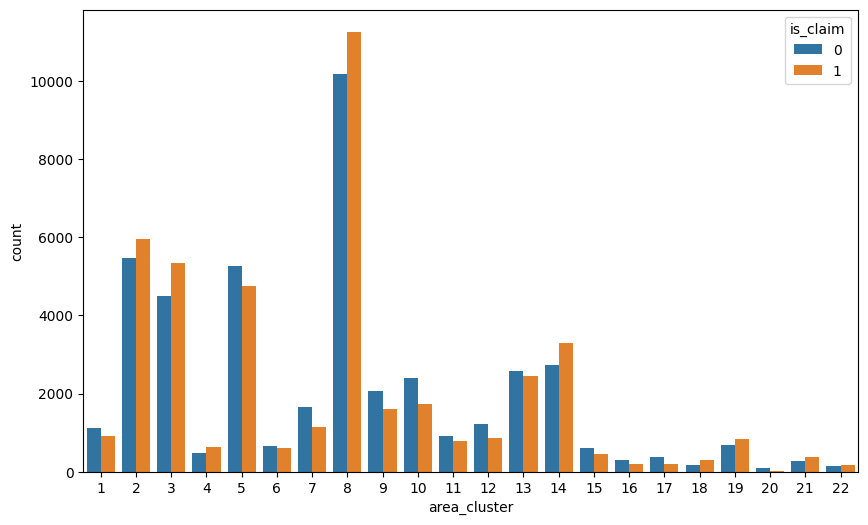

In [ ]:
train_data_smote = pd.concat([X_train_smote, y_train_smote], axis=1)

plt.figure(figsize=(10, 6))
sns.countplot(x="area_cluster", data=train_data_smote, hue="is_claim")

cluster_counts = train_data_smote["area_cluster"].value_counts()
cluster_percent = (train_data_smote["area_cluster"].value_counts(normalize=True) * 100).round(2)

cluster_summary = pd.DataFrame({
    "Jumlah": cluster_counts,
    "Persentase (%)": cluster_percent
})

print(cluster_summary)

counts = train_data.groupby(["area_cluster", "is_claim"]).size().unstack(fill_value=0)
proportions = (counts.T / counts.sum(axis=1)).T * 100

print("\nProporsi per cluster (%):")
print(proportions.round(2))

# Modeling


In [ ]:
model = XGBClassifier(enable_categorical=True)
model.fit(X_train, y_train)

model_smote = XGBClassifier(enable_categorical=True)
model_smote.fit(X_train_smote, y_train_smote)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=True, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

# Evaluation


In [ ]:
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
)

y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]
print("Without SMOTE:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, y_proba))

y_pred_smote = model_smote.predict(X_test)
y_proba_smote = model_smote.predict_proba(X_test)[:, 1]
print("\nWith SMOTE:")
print("Accuracy:", accuracy_score(y_test, y_pred_smote))
print("Precision:", precision_score(y_test, y_pred_smote))
print("Recall:", recall_score(y_test, y_pred_smote))
print("F1 Score:", f1_score(y_test, y_pred_smote))
print("ROC AUC Score:", roc_auc_score(y_test, y_proba_smote))


Without SMOTE:
Accuracy: 0.9352333816878573
Precision: 0.0
Recall: 0.0
F1 Score: 0.0
ROC AUC Score: 0.6247471966450906

With SMOTE:
Accuracy: 0.9254202577011691
Precision: 0.12195121951219512
Recall: 0.02666666666666667
F1 Score: 0.0437636761487965
ROC AUC Score: 0.6358540736013614


In [ ]:
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
)

y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]
print("Without SMOTE (macro averaging):")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, average="macro", zero_division=0))
print("Recall:", recall_score(y_test, y_pred, average="macro", zero_division=0))
print("F1 Score:", f1_score(y_test, y_pred, average="macro", zero_division=0))
print("ROC AUC Score:", roc_auc_score(y_test, y_proba, average="macro"))

y_pred_smote = model_smote.predict(X_test)
y_proba_smote = model_smote.predict_proba(X_test)[:, 1]
print("\nWith SMOTE (macro averaging):")
print("Accuracy:", accuracy_score(y_test, y_pred_smote))
print("Precision:", precision_score(y_test, y_pred_smote, average="macro", zero_division=0))
print("Recall:", recall_score(y_test, y_pred_smote, average="macro", zero_division=0))
print("F1 Score:", f1_score(y_test, y_pred_smote, average="macro"))
print("ROC AUC Score:", roc_auc_score(y_test, y_proba_smote))


Without SMOTE (macro averaging):
Accuracy: 0.9352333816878573
Precision: 0.46797608881298036
Recall: 0.49958975294010394
F1 Score: 0.48326645795670004
ROC AUC Score: 0.6247471966450906

With SMOTE (macro averaging):
Accuracy: 0.9254202577011691
Precision: 0.5293875526379669
Recall: 0.5067693803749962
F1 Score: 0.5024803108145864
ROC AUC Score: 0.6358540736013614


Without SMOTE:
Accuracy: 0.9352333816878573
Precision: 0.0
Recall: 0.0
F1 Score: 0.0
ROC AUC Score: 0.6247471966450906


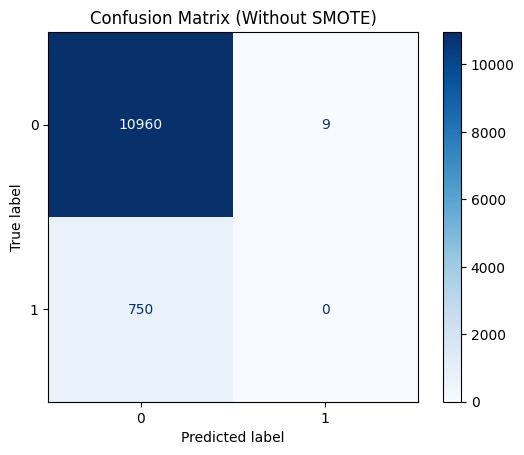


With SMOTE:
Accuracy: 0.9254202577011691
Precision: 0.12195121951219512
Recall: 0.02666666666666667
F1 Score: 0.0437636761487965
ROC AUC Score: 0.6358540736013614


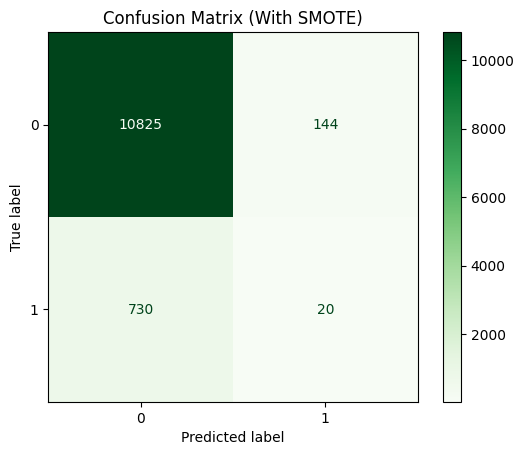

In [ ]:
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
    confusion_matrix,
    ConfusionMatrixDisplay
)
import matplotlib.pyplot as plt

# Prediksi tanpa SMOTE
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]

print("Without SMOTE:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, y_proba))

# Confusion Matrix tanpa SMOTE
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap="Blues")
plt.title("Confusion Matrix (Without SMOTE)")
plt.show()

# Prediksi dengan SMOTE
y_pred_smote = model_smote.predict(X_test)
y_proba_smote = model_smote.predict_proba(X_test)[:, 1]

print("\nWith SMOTE:")
print("Accuracy:", accuracy_score(y_test, y_pred_smote))
print("Precision:", precision_score(y_test, y_pred_smote))
print("Recall:", recall_score(y_test, y_pred_smote))
print("F1 Score:", f1_score(y_test, y_pred_smote))
print("ROC AUC Score:", roc_auc_score(y_test, y_proba_smote))

# Confusion Matrix dengan SMOTE
cm_smote = confusion_matrix(y_test, y_pred_smote)
disp_smote = ConfusionMatrixDisplay(confusion_matrix=cm_smote, display_labels=model_smote.classes_)
disp_smote.plot(cmap="Greens")
plt.title("Confusion Matrix (With SMOTE)")
plt.show()

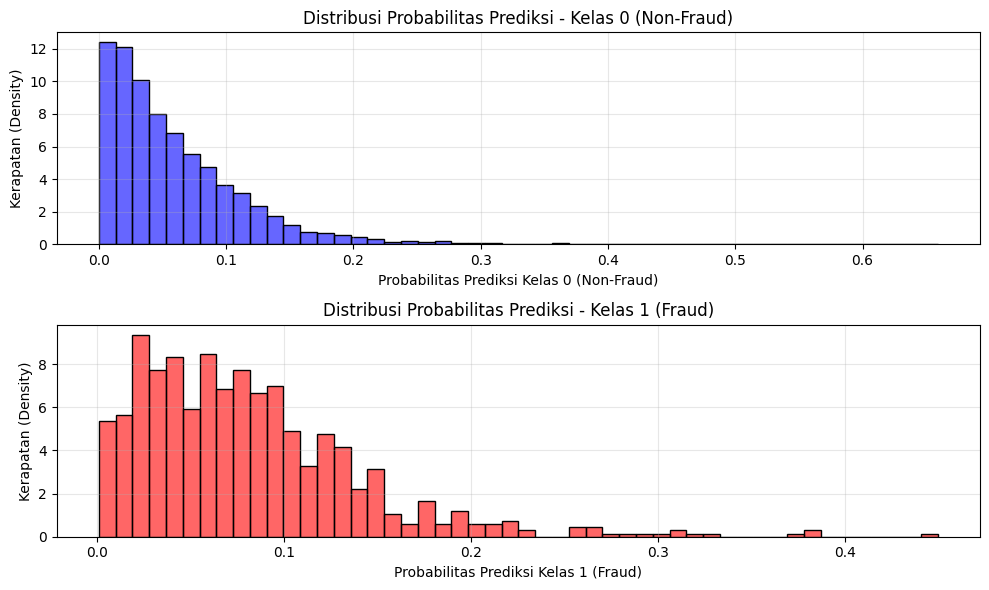

In [ ]:
plt.figure(figsize=(10, 6))

# Plot untuk kelas 0 (Non-Fraud)
plt.subplot(2, 1, 1)
sns.histplot(y_proba[y_test == 0], bins=50, color="blue", stat="density", alpha=0.6)
plt.title("Distribusi Probabilitas Prediksi - Kelas 0 (Non-Fraud)")
plt.xlabel("Probabilitas Prediksi Kelas 0 (Non-Fraud)")
plt.ylabel("Kerapatan (Density)")
plt.grid(alpha=0.3)

# Plot untuk kelas 1 (Fraud)
plt.subplot(2, 1, 2)
sns.histplot(y_proba[y_test == 1], bins=50, color="red", stat="density", alpha=0.6)
plt.title("Distribusi Probabilitas Prediksi - Kelas 1 (Fraud)")
plt.xlabel("Probabilitas Prediksi Kelas 1 (Fraud)")
plt.ylabel("Kerapatan (Density)")
plt.grid(alpha=0.3)

plt.tight_layout()
plt.show()

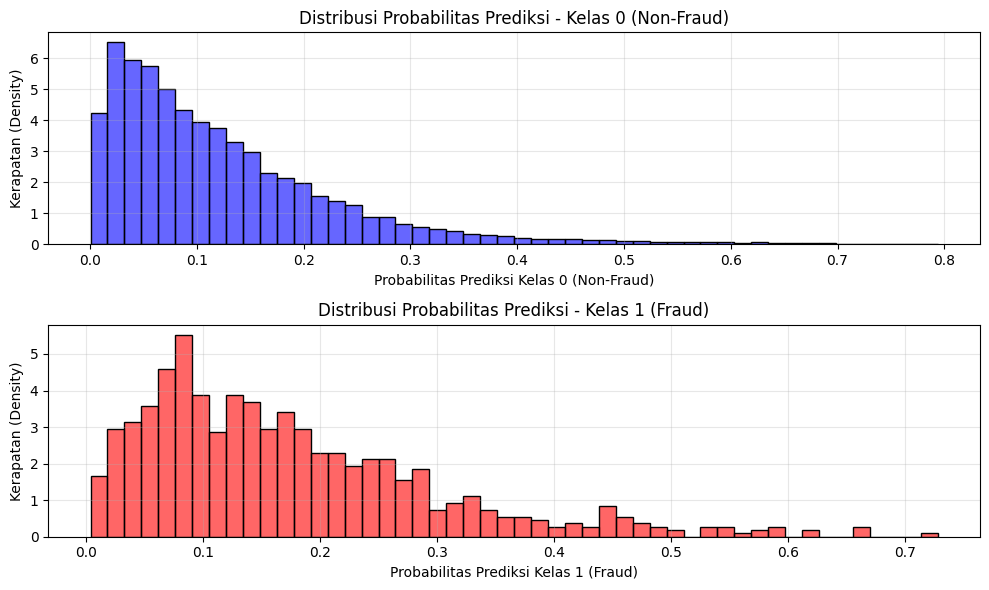

In [ ]:
plt.figure(figsize=(10, 6))

# Plot untuk kelas 0 (Non-Fraud)
plt.subplot(2, 1, 1)
sns.histplot(y_proba_smote[y_test == 0], bins=50, color="blue", stat="density", alpha=0.6)
plt.title("Distribusi Probabilitas Prediksi - Kelas 0 (Non-Fraud)")
plt.xlabel("Probabilitas Prediksi Kelas 0 (Non-Fraud)")
plt.ylabel("Kerapatan (Density)")
plt.grid(alpha=0.3)

# Plot untuk kelas 1 (Fraud)
plt.subplot(2, 1, 2)
sns.histplot(y_proba_smote[y_test == 1], bins=50, color="red", stat="density", alpha=0.6)
plt.title("Distribusi Probabilitas Prediksi - Kelas 1 (Fraud)")
plt.xlabel("Probabilitas Prediksi Kelas 1 (Fraud)")
plt.ylabel("Kerapatan (Density)")
plt.grid(alpha=0.3)

plt.tight_layout()
plt.show()

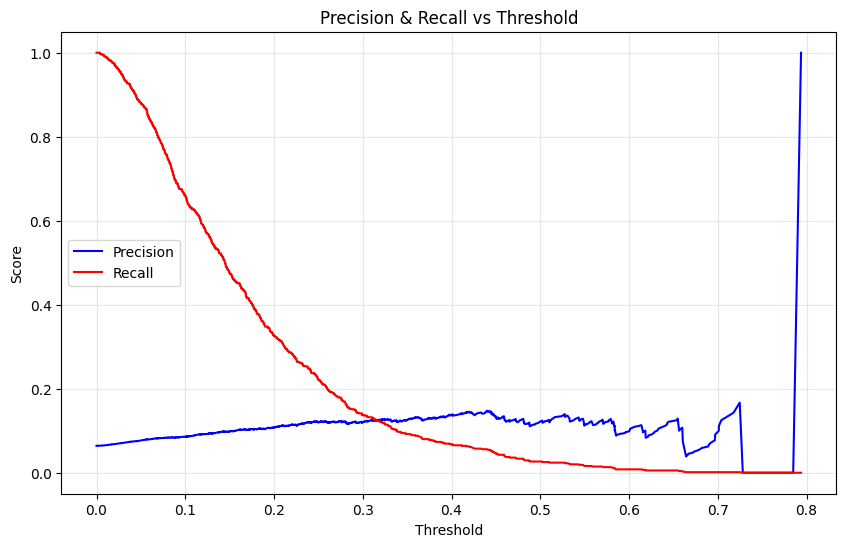

In [ ]:
probs = y_proba_smote
precision, recall, thresholds = precision_recall_curve(y_test, probs)
thresholds = np.append(0, thresholds)

plt.figure(figsize=(10,6))
plt.plot(thresholds, precision, label='Precision', color='blue')
plt.plot(thresholds, recall, label='Recall', color='red')
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.title('Precision & Recall vs Threshold')
plt.grid(alpha=0.3)
plt.legend()
plt.show()

# Feature Importance

<Figure size 1000x600 with 0 Axes>

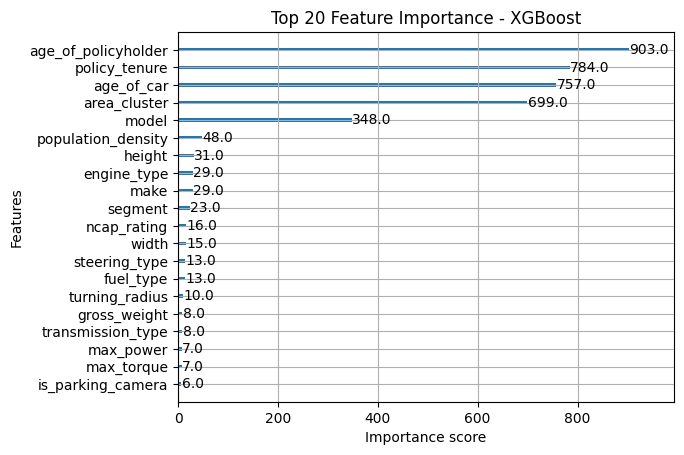

In [ ]:
from xgboost import XGBClassifier
from xgboost import plot_importance

plt.figure(figsize=(10,6))
plot_importance(model_smote, importance_type='weight', max_num_features=20)
plt.title('Top 20 Feature Importance - XGBoost')
plt.show()

In [ ]:
numeric_cols = X_train.select_dtypes(include=np.number).columns

corr_numeric = pd.concat([
    X_train[numeric_cols],
    y_train.reset_index(drop=True)
], axis=1).corr(method='pearson')['is_claim'][:-1].sort_values(key=abs, ascending=False)

print("Korelasi fitur numerik terhadap is_claim:")
print(corr_numeric)

Korelasi fitur numerik terhadap is_claim:
max_torque            -0.006462
height                -0.006382
displacement          -0.005462
segment               -0.004552
max_power             -0.004064
cylinder              -0.003580
steering_type          0.003412
age_of_car             0.003004
transmission_type      0.002999
length                -0.002957
age_of_policyholder    0.002399
fuel_type              0.002286
population_density    -0.001810
turning_radius        -0.001742
gear_box               0.001679
rear_brakes_type       0.001549
gross_weight           0.001430
width                  0.001048
engine_type           -0.000926
airbags                0.000904
policy_tenure          0.000615
Name: is_claim, dtype: float64


In [ ]:
numeric_cols = X_train_smote.select_dtypes(include=np.number).columns

corr_numeric = pd.concat([
    X_train_smote[numeric_cols],
    y_train_smote.reset_index(drop=True)
], axis=1).corr(method='pearson')['is_claim'][:-1].sort_values(key=abs, ascending=False)

print("Korelasi fitur numerik terhadap is_claim:")
print(corr_numeric)

Korelasi fitur numerik terhadap is_claim:
policy_tenure          1.762492e-01
age_of_car            -6.762973e-02
population_density    -4.386347e-02
age_of_policyholder    3.645337e-02
steering_type         -2.762104e-02
cylinder               2.223285e-02
fuel_type              1.773387e-02
width                  1.612349e-02
height                -1.541406e-02
gear_box              -1.328400e-02
max_torque            -8.701872e-03
displacement           6.234968e-03
rear_brakes_type       6.218858e-03
engine_type            5.667411e-03
turning_radius        -4.751807e-03
length                 3.938641e-03
airbags               -3.001775e-03
max_power             -1.321646e-03
gross_weight           7.557451e-04
segment               -5.891456e-05
transmission_type     -8.786830e-16
Name: is_claim, dtype: float64


# Hyperparameter Tuning

In [ ]:
# FUNGSI INISIALISASI FOX
def initialization(search_agents_no, dim, ub, lb):
    X = np.zeros((search_agents_no, dim))
    for i in range(dim):
        ub_i = ub[i]
        lb_i = lb[i]
        X[:, i] = np.random.rand(search_agents_no) * (ub_i - lb_i) + lb_i
    return X

# ALGORITMA FOX
def FOX(search_agents_no, max_iter, lb, ub, dim, fobj, tolerance=1e-4, patience=10):
    best_pos = np.zeros(dim)
    best_score = np.inf
    min_t = np.inf

    X = initialization(search_agents_no, dim, ub, lb)
    distance_fox_rat = np.zeros((search_agents_no, dim))

    l = 0
    c1, c2 = 0.18, 0.82
    convergence_curve = []
    no_improvement_counter = 0
    previous_best_score = best_score

    while l < max_iter:
        for i in range(X.shape[0]):
            X[i, :] = np.clip(X[i, :], lb, ub)
            fitness = fobj(X[i, :])
            if fitness < best_score:
                best_score = fitness
                best_pos = X[i, :]

        convergence_curve.append(best_score)

        if abs(previous_best_score - best_score) < tolerance:
            no_improvement_counter += 1
        else:
            no_improvement_counter = 0

        if no_improvement_counter >= patience:
            print(f"Early stopping at iteration {l} due to no significant improvement.")
            break

        previous_best_score = best_score
        a = 2 * (1 - (l / max_iter))
        jump = 0

        for i in range(X.shape[0]):
            r = np.random.rand()
            p = np.random.rand()

            if r >= 0.5:
                if p > 0.18:
                    time = np.random.rand(1, dim)
                    sps = best_pos / np.maximum(time, 1e-10)
                    distance_s_travel = sps * time
                    distance_fox_rat[i, :] = 0.5 * distance_s_travel
                    tt = np.sum(time) / dim
                    t = tt / 2
                    jump = 0.5 * 9.81 * t**2
                    X[i, :] = distance_fox_rat[i, :] * jump * c1
                elif p <= 0.18:
                    time = np.random.rand(1, dim)
                    sps = best_pos / np.maximum(time, 1e-10)
                    distance_s_travel = sps * time
                    distance_fox_rat[i, :] = 0.5 * distance_s_travel
                    tt = np.sum(time) / dim
                    t = tt / 2
                    jump = 0.5 * 9.81 * t**2
                    X[i, :] = distance_fox_rat[i, :] * jump * c2

                if min_t > tt:
                    min_t = tt

            else:
                ans = best_pos + np.random.randn(1, dim) * (min_t * a)
                X[i, :] = ans

            X[i, :] = np.clip(X[i, :], lb, ub)
        l += 1

    return best_score, best_pos, convergence_curve

# FUNGSI FITNESS UNTUK XGBOOST
def xgb_fitness(params):
    # Ambil parameter sesuai urutan
    n_estimators = int(np.clip(params[0], lb[0], ub[0]))
    learning_rate = float(np.clip(params[1], lb[1], ub[1]))
    min_child_weight = int(np.clip(params[2], lb[2], ub[2]))
    max_depth = int(np.clip(params[3], lb[3], ub[3]))
    max_delta_step = int(np.clip(params[4], lb[4], ub[4]))
    subsample = float(np.clip(params[5], lb[5], ub[5]))
    colsample_bytree = float(np.clip(params[6], lb[6], ub[6]))
    colsample_bylevel = float(np.clip(params[7], lb[7], ub[7]))
    reg_lambda = float(np.clip(params[8], lb[8], ub[8]))
    reg_alpha = float(np.clip(params[9], lb[9], ub[9]))
    gamma = float(np.clip(params[10], lb[10], ub[10]))
    scale_pos_weight = float(np.clip(params[11], lb[11], ub[11]))

    # Buat model XGBoost
    model = XGBClassifier(
        n_estimators=n_estimators,
        learning_rate=learning_rate,
        min_child_weight=min_child_weight,
        max_depth=max_depth,
        max_delta_step=max_delta_step,
        subsample=subsample,
        colsample_bytree=colsample_bytree,
        colsample_bylevel=colsample_bylevel,
        reg_lambda=reg_lambda,
        reg_alpha=reg_alpha,
        gamma=gamma,
        scale_pos_weight=scale_pos_weight,
        enable_categorical=True,
        use_label_encoder=False,
        eval_metric='logloss',
        random_state=42,
        verbosity=0
    )

    score = cross_val_score(model, X_train, y_train, cv=5, scoring='recall').mean()
    return -score  # Karena FOX meminimalkan fitness

# BATAS PARAMETER
lb = [
    10,       # n_estimators
    0.01,     # learning_rate
    1,        # min_child_weight
    1,        # max_depth
    0,        # max_delta_step
    0.1,      # subsample
    0.1,      # colsample_bytree
    0.1,      # colsample_bylevel
    1e-9,     # reg_lambda
    1e-9,     # reg_alpha
    1e-9,     # gamma
    1e-6      # scale_pos_weight
]

ub = [
    5000,     # n_estimators
    1.0,      # learning_rate
    10,       # min_child_weight
    50,       # max_depth
    20,       # max_delta_step
    1.0,      # subsample
    1.0,      # colsample_bytree
    1.0,      # colsample_bylevel
    100.0,    # reg_lambda
    100.0,    # reg_alpha
    0.5,      # gamma
    500.0     # scale_pos_weight
]

# === JALANKAN OPTIMISASI FOX ===
search_agents_no = 15
max_iter = 50
dim = len(lb)

best_score, best_params, convergence_curve = FOX(search_agents_no, max_iter, lb, ub, dim, xgb_fitness)

# === CETAK HASIL ===
print("\nHyperparameters terbaik untuk XGBoost:")
param_names = [
    'n_estimators', 'learning_rate', 'min_child_weight', 'max_depth', 'max_delta_step',
    'subsample', 'colsample_bytree', 'colsample_bylevel',
    'reg_lambda', 'reg_alpha', 'gamma', 'scale_pos_weight'
]
for name, val in zip(param_names, best_params):
    print(f"{name}: {val}")
print("Akurasi terbaik:", -best_score)

# === PLOT KONVERGENSI ===
plt.plot(convergence_curve, color='blue', lw=2)
plt.xlabel('Iteration')
plt.ylabel('Best Fitness Score')
plt.title('Convergence Curve of FOX for XGBoost')
plt.grid(True)
plt.show()

# === EVALUASI MODEL TERBAIK ===
best_model = XGBClassifier(
    n_estimators=int(best_params[0]),
    learning_rate=float(best_params[1]),
    min_child_weight=int(best_params[2]),
    max_depth=int(best_params[3]),
    max_delta_step=int(best_params[4]),
    subsample=float(best_params[5]),
    colsample_bytree=float(best_params[6]),
    colsample_bylevel=float(best_params[7]),
    reg_lambda=float(best_params[8]),
    reg_alpha=float(best_params[9]),
    gamma=float(best_params[10]),
    scale_pos_weight=float(best_params[11]),
    enable_categorical=True,
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42,
    verbosity=0
)

best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)
y_proba = best_model.predict_proba(X_test)[:, 1]

# Evaluasi
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_proba)

print("\nEvaluasi pada XGBoost model terbaik:")
print("Akurasi:", accuracy)
print("Presisi:", precision)
print("Recall:", recall)
print("F1-Score:", f1)
print("AUC (ROC):", auc)

# Evaluasi with average macro
accuracy_avgmacro = accuracy_score(y_test, y_pred)
precision_avgmacro = precision_score(y_test, y_pred, average="macro", zero_division=0)
recall_avgmacro = recall_score(y_test, y_pred, average="macro", zero_division=0)
f1_avgmacro = f1_score(y_test, y_pred, average="macro", zero_division=0)
auc_avgmacro = roc_auc_score(y_test, y_proba)

print("\nEvaluasi pada XGBoost model terbaik:")
print("Akurasi:", accuracy)
print("Presisi:", precision_avgmacro)
print("Recall:", recall_avgmacro)
print("F1-Score:", f1_avgmacro)
print("AUC (ROC):", auc_avgmacro)


KeyboardInterrupt: 

In [ ]:
# FUNGSI INISIALISASI FOX
def initialization(search_agents_no, dim, ub, lb):
    X = np.zeros((search_agents_no, dim))
    for i in range(dim):
        ub_i = ub[i]
        lb_i = lb[i]
        X[:, i] = np.random.rand(search_agents_no) * (ub_i - lb_i) + lb_i
    return X

# ALGORITMA FOX
def FOX(search_agents_no, max_iter, lb, ub, dim, fobj, tolerance=1e-4, patience=10):
    best_pos = np.zeros(dim)
    best_score = np.inf
    min_t = np.inf

    X = initialization(search_agents_no, dim, ub, lb)
    distance_fox_rat = np.zeros((search_agents_no, dim))

    l = 0
    c1, c2 = 0.18, 0.82
    convergence_curve = []
    no_improvement_counter = 0
    previous_best_score = best_score

    while l < max_iter:
        for i in range(X.shape[0]):
            X[i, :] = np.clip(X[i, :], lb, ub)
            fitness = fobj(X[i, :])
            if fitness < best_score:
                best_score = fitness
                best_pos = X[i, :]

        convergence_curve.append(best_score)

        if abs(previous_best_score - best_score) < tolerance:
            no_improvement_counter += 1
        else:
            no_improvement_counter = 0

        if no_improvement_counter >= patience:
            print(f"Early stopping at iteration {l} due to no significant improvement.")
            break

        previous_best_score = best_score
        a = 2 * (1 - (l / max_iter))
        jump = 0

        for i in range(X.shape[0]):
            r = np.random.rand()
            p = np.random.rand()

            if r >= 0.5:
                if p > 0.18:
                    time = np.random.rand(1, dim)
                    sps = best_pos / np.maximum(time, 1e-10)
                    distance_s_travel = sps * time
                    distance_fox_rat[i, :] = 0.5 * distance_s_travel
                    tt = np.sum(time) / dim
                    t = tt / 2
                    jump = 0.5 * 9.81 * t**2
                    X[i, :] = distance_fox_rat[i, :] * jump * c1
                elif p <= 0.18:
                    time = np.random.rand(1, dim)
                    sps = best_pos / np.maximum(time, 1e-10)
                    distance_s_travel = sps * time
                    distance_fox_rat[i, :] = 0.5 * distance_s_travel
                    tt = np.sum(time) / dim
                    t = tt / 2
                    jump = 0.5 * 9.81 * t**2
                    X[i, :] = distance_fox_rat[i, :] * jump * c2

                if min_t > tt:
                    min_t = tt

            else:
                ans = best_pos + np.random.randn(1, dim) * (min_t * a)
                X[i, :] = ans

            X[i, :] = np.clip(X[i, :], lb, ub)
        l += 1

    return best_score, best_pos, convergence_curve

# FUNGSI FITNESS UNTUK XGBOOST
def xgb_fitness(params):
    # Ambil parameter sesuai urutan
    n_estimators = int(np.clip(params[0], lb[0], ub[0]))
    learning_rate = float(np.clip(params[1], lb[1], ub[1]))
    min_child_weight = int(np.clip(params[2], lb[2], ub[2]))
    max_depth = int(np.clip(params[3], lb[3], ub[3]))
    max_delta_step = int(np.clip(params[4], lb[4], ub[4]))
    subsample = float(np.clip(params[5], lb[5], ub[5]))
    colsample_bytree = float(np.clip(params[6], lb[6], ub[6]))
    colsample_bylevel = float(np.clip(params[7], lb[7], ub[7]))
    reg_lambda = float(np.clip(params[8], lb[8], ub[8]))
    reg_alpha = float(np.clip(params[9], lb[9], ub[9]))
    gamma = float(np.clip(params[10], lb[10], ub[10]))
    scale_pos_weight = float(np.clip(params[11], lb[11], ub[11]))

    # Buat model XGBoost
    model = XGBClassifier(
        n_estimators=n_estimators,
        learning_rate=learning_rate,
        min_child_weight=min_child_weight,
        max_depth=max_depth,
        max_delta_step=max_delta_step,
        subsample=subsample,
        colsample_bytree=colsample_bytree,
        colsample_bylevel=colsample_bylevel,
        reg_lambda=reg_lambda,
        reg_alpha=reg_alpha,
        gamma=gamma,
        scale_pos_weight=scale_pos_weight,
        enable_categorical=True,
        use_label_encoder=False,
        eval_metric='logloss',
        random_state=42,
        verbosity=0
    )

    score = cross_val_score(model, X_train, y_train, cv=5, scoring='recall').mean()
    return -score  # Karena FOX meminimalkan fitness

# BATAS PARAMETER
lb = [
    10,       # n_estimators
    0.01,     # learning_rate
    1,        # min_child_weight
    1,        # max_depth
    0,        # max_delta_step
    0.1,      # subsample
    0.1,      # colsample_bytree
    0.1,      # colsample_bylevel
    1e-9,     # reg_lambda
    1e-9,     # reg_alpha
    1e-9,     # gamma
    1e-6      # scale_pos_weight
]

ub = [
    5000,     # n_estimators
    1.0,      # learning_rate
    10,       # min_child_weight
    50,       # max_depth
    20,       # max_delta_step
    1.0,      # subsample
    1.0,      # colsample_bytree
    1.0,      # colsample_bylevel
    100.0,    # reg_lambda
    100.0,    # reg_alpha
    0.5,      # gamma
    500.0     # scale_pos_weight
]

# === JALANKAN OPTIMISASI FOX ===
search_agents_no = 15
max_iter = 50
dim = len(lb)

best_score, best_params, convergence_curve = FOX(search_agents_no, max_iter, lb, ub, dim, xgb_fitness)

# === CETAK HASIL ===
print("\nHyperparameters terbaik untuk XGBoost:")
param_names = [
    'n_estimators', 'learning_rate', 'min_child_weight', 'max_depth', 'max_delta_step',
    'subsample', 'colsample_bytree', 'colsample_bylevel',
    'reg_lambda', 'reg_alpha', 'gamma', 'scale_pos_weight'
]
for name, val in zip(param_names, best_params):
    print(f"{name}: {val}")
print("Akurasi terbaik:", -best_score)

# === PLOT KONVERGENSI ===
plt.plot(convergence_curve, color='blue', lw=2)
plt.xlabel('Iteration')
plt.ylabel('Best Fitness Score')
plt.title('Convergence Curve of FOX for XGBoost')
plt.grid(True)
plt.show()

# === EVALUASI MODEL TERBAIK ===
best_model_smote = XGBClassifier(
    n_estimators=int(best_params[0]),
    learning_rate=float(best_params[1]),
    min_child_weight=int(best_params[2]),
    max_depth=int(best_params[3]),
    max_delta_step=int(best_params[4]),
    subsample=float(best_params[5]),
    colsample_bytree=float(best_params[6]),
    colsample_bylevel=float(best_params[7]),
    reg_lambda=float(best_params[8]),
    reg_alpha=float(best_params[9]),
    gamma=float(best_params[10]),
    scale_pos_weight=float(best_params[11]),
    enable_categorical=True,
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42,
    verbosity=0
)

best_model.fit(X_train_smote, y_train_smote)
y_pred_smote = best_model.predict(X_test)
y_proba_smote = best_model.predict_proba(X_test)[:, 1]

# Evaluasi
accuracy_smote = accuracy_score(y_test, y_pred_smote)
precision_smote = precision_score(y_test, y_pred_smote)
recall_smote = recall_score(y_test, y_pred_smote)
f1_smote = f1_score(y_test, y_pred_smote)
auc_smote = roc_auc_score(y_test, y_proba_smote)

print("\nEvaluasi pada XGBoost model terbaik:")
print("Akurasi:", accuracy_smote)
print("Presisi:", precision_smote)
print("Recall:", recall_smote)
print("F1-Score:", f1_smote)
print("AUC (ROC):", auc_smote)

# Evaluasi with average macro
accuracy_avgmacro_smote = accuracy_score(y_test, y_pred_smote)
precision_avgmacro_smote = precision_score(y_test, y_pred_smote, average="macro", zero_division=0)
recall_avgmacro_smote = recall_score(y_test, y_pred_smote, average="macro", zero_division=0)
f1_avgmacro_smote = f1_score(y_test, y_pred_smote, average="macro", zero_division=0)
auc_avgmacro_smote = roc_auc_score(y_test, y_proba_smote)

print("\nEvaluasi pada XGBoost model terbaik:")
print("Akurasi:", accuracy_smote)
print("Presisi:", precision_avgmacro_smote)
print("Recall:", recall_avgmacro_smote)
print("F1-Score:", f1_avgmacro_smote)
print("AUC (ROC):", auc_avgmacro_smote)
